In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
idx = pd.IndexSlice

plotconfig = {
    'style':'.',
    'ylim':(0,2000),
    'xlim':('2018-01-01','2021-01-01'),
    'grid':True,
    'markersize':5,
    'figsize':(20,6)
}

locations = pd.read_csv('csv/locations.csv',index_col='name')
directions = pd.read_csv('csv/directions.csv',index_col='name')

detections = pd.read_csv('csv/detections.csv',index_col=['location','direction','ts'],parse_dates=True).value.sort_index()

def series_for_direction(detections,location,direction):
    return detections.loc[(location, direction)].rename((location, direction))

series = series_for_direction(detections,'Podolské nábřeží - stezka','do centra (Výtoň)')
another = series_for_direction(detections,'Podolské nábřeží - stezka','z centra (Braník)')

# Lecture 7 - Pandas

by Vítek Macháček, inspired by Martin Hronec

* Pan(el) Da(ta)
* go-to package for data analysis in Python
* designed for working with "labeled" (relational data)
* developed by Wes McKinney in 2008 while at AQR Capital Management out of the need for a tool to perform quantitative analysis on financial data (convinced AQR to open-source it)

* two primary data structures:
    * *Series* (1D labeled homogeneously-typed array)
    * *DataFrame* (2D labeled, tabular structure with potentially heterogeneously-typed column)

* built on top of NumPy
* Vast majority of your python data work should start and end in Pandas.
* Huge ecosystem that built around 

Here are just a few of the things that pandas does well:

* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data

* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects

* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations

* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data

* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects

* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

* Intuitive merging and joining data sets

* Flexible reshaping and pivoting of data sets

* Hierarchical labeling of axes (possible to have multiple labels per tick)

* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format

* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging.



## `pd.Series` - labelled 1D object

###  Construction

Series can be created using:
* `dict`


```python 
pd.Series({'Vítek':31,'Martin':30, 'Honza':30})
```

* `list`, `tuple` or `np.array`


```python 
pd.Series(np.random.randint(100,size=(10,)),index=[f'Person {i}' for i in range(10)],name='Age')
```

* scalar

```python
pd.Series(np.nan,index=['Vítek','Martin','Honza'],name='NANs')
```

Main attributes:

* `values` - collection of measurements, categories etc.
* `name` - column name
* `dtype` - datatype - `int`,`float`,`pd.Timestamp`,`object`
* `shape`

In [3]:
series#.plot()

ts
2018-01-01    115.0
2018-01-02    190.0
2018-01-03     72.0
2018-01-04    149.0
2018-01-05    155.0
              ...  
2022-03-24    800.0
2022-03-25    661.0
2022-03-26    820.0
2022-03-27    786.0
2022-03-28    632.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 1548, dtype: float64

`name`

In [4]:
series.name

('Podolské nábřeží - stezka', 'do centra (Výtoň)')

`values`

In [5]:
series.values

array([115., 190.,  72., ..., 820., 786., 632.])

`index`

In [6]:
series.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26',
               '2022-03-27', '2022-03-28'],
              dtype='datetime64[ns]', name='ts', length=1548, freq=None)

`dtype`

In [7]:
series.dtype

dtype('float64')

`shape`

In [8]:
series.shape

(1548,)

## Args/Kwargs

In [9]:
plotconfig

{'style': '.',
 'ylim': (0, 2000),
 'xlim': ('2018-01-01', '2021-01-01'),
 'grid': True,
 'markersize': 5,
 'figsize': (20, 6)}

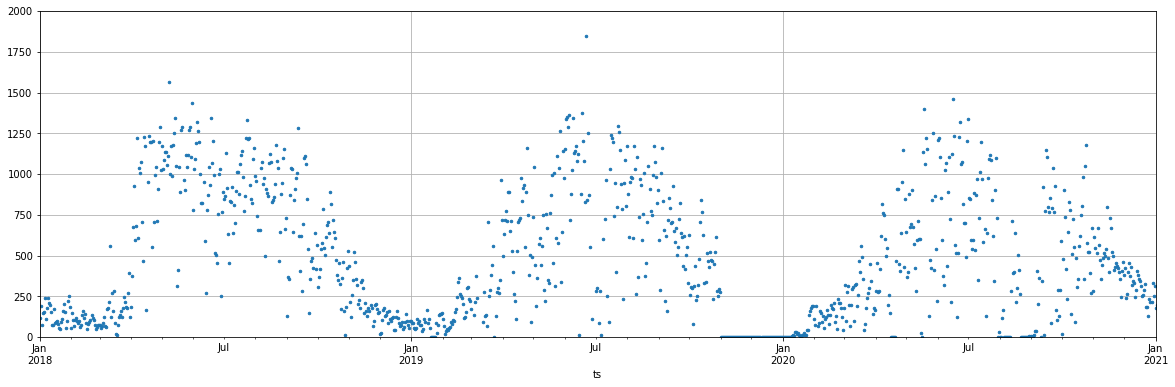

In [10]:
series.plot(**plotconfig);

In [13]:
series.add(another)# series + another

ts
2018-01-01     207.0
2018-01-02     318.0
2018-01-03     134.0
2018-01-04     261.0
2018-01-05     280.0
               ...  
2022-03-24    1367.0
2022-03-25    1121.0
2022-03-26    1459.0
2022-03-27    1435.0
2022-03-28    1073.0
Length: 1548, dtype: float64

## Indexing data
### Using `loc` - select using `index`

In [16]:
series['2021-12-24']

78.0

In [17]:
series.loc['2022-01-01':'2022-02-28']

ts
2022-01-01    248.0
2022-01-02    261.0
2022-01-03    368.0
2022-01-04    166.0
2022-01-05    207.0
2022-01-06    254.0
2022-01-07    203.0
2022-01-08    111.0
2022-01-09     82.0
2022-01-10    214.0
2022-01-11    228.0
2022-01-12    218.0
2022-01-13    236.0
2022-01-14    288.0
2022-01-15    200.0
2022-01-16    119.0
2022-01-17    165.0
2022-01-18    159.0
2022-01-19    199.0
2022-01-20    131.0
2022-01-21     75.0
2022-01-22    106.0
2022-01-23    126.0
2022-01-24    198.0
2022-01-25    230.0
2022-01-26    235.0
2022-01-27    191.0
2022-01-28    168.0
2022-01-29     89.0
2022-01-30     88.0
2022-01-31    167.0
2022-02-01    154.0
2022-02-02    162.0
2022-02-03    198.0
2022-02-04    198.0
2022-02-05    172.0
2022-02-06     95.0
2022-02-07    187.0
2022-02-08    242.0
2022-02-09    319.0
2022-02-10    384.0
2022-02-11    182.0
2022-02-12    254.0
2022-02-13    260.0
2022-02-14    312.0
2022-02-15    244.0
2022-02-16    262.0
2022-02-17    133.0
2022-02-18    230.0
2022-02-19    148

In [20]:
series.loc[[f'{year}-{month:02}-01' for year in range(2018,2022) for month in range(1,13)]]

ts
2018-01-01     115.0
2018-02-01      55.0
2018-03-01      72.0
2018-04-01     188.0
2018-05-01    1171.0
2018-06-01     783.0
2018-07-01     847.0
2018-08-01     987.0
2018-09-01     129.0
2018-10-01     307.0
2018-11-01     438.0
2018-12-01      21.0
2019-01-01     102.0
2019-02-01     111.0
2019-03-01     175.0
2019-04-01     497.0
2019-05-01     739.0
2019-06-01    1153.0
2019-07-01     286.0
2019-08-01    1171.0
2019-09-01     595.0
2019-10-01     625.0
2019-11-01       0.0
2019-12-01       0.0
2020-01-01       0.0
2020-02-01     112.0
2020-03-01     177.0
2020-04-01     286.0
2020-05-01     643.0
2020-06-01    1210.0
2020-07-01    1335.0
2020-08-01       0.0
2020-09-01       8.0
2020-10-01      18.0
2020-11-01     281.0
2020-12-01     379.0
2021-01-01     180.0
2021-02-01     256.0
2021-03-01     402.0
2021-04-01    1358.0
2021-05-01     867.0
2021-06-01    1425.0
2021-07-01     681.0
2021-08-01     262.0
2021-09-01     976.0
2021-10-01     705.0
2021-11-01     279.0
2021-12-01

In [32]:
series.loc['2021-03-28'] = 450

### Using `iloc` - select by order in the series

* generally not recommended

In [34]:
series.iloc[0]

115.0

In [22]:
series.iloc[-1]

632.0

### subsetting using `mask` - conditional on value of series

<AxesSubplot:xlabel='ts'>

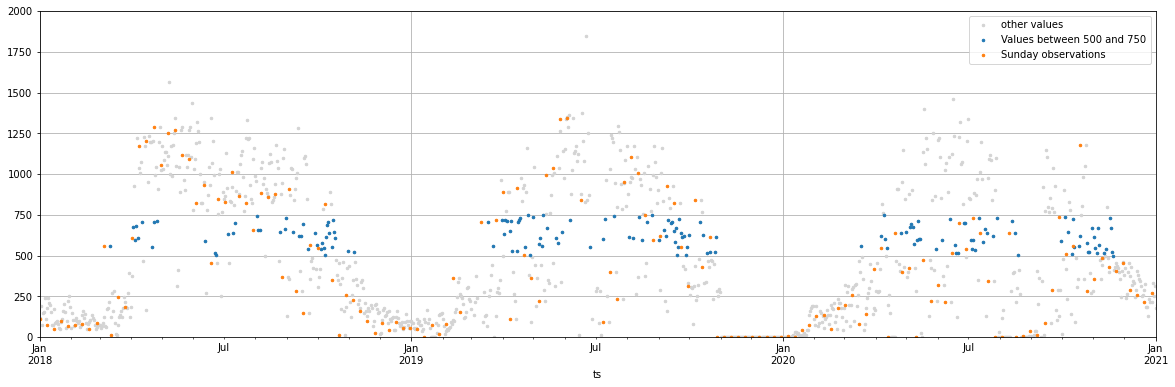

In [45]:
ax = series.plot(color = 'lightgrey',label='other values',legend=True,**plotconfig)
series[(series >= 500) & (series < 750)].plot(ax=ax,label='Values between 500 and 750',legend=True,**plotconfig)
series[series.index.weekday == 6].plot(ax=ax,label='Sunday observations',legend=True,**plotconfig)

In [25]:
series >= 500

ts
2018-01-01    False
2018-01-02    False
2018-01-03    False
2018-01-04    False
2018-01-05    False
              ...  
2022-03-24     True
2022-03-25     True
2022-03-26     True
2022-03-27     True
2022-03-28     True
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 1548, dtype: bool

In [37]:
(series >= 500) & (series < 750)

ts
2018-01-01    False
2018-01-02    False
2018-01-03    False
2018-01-04    False
2018-01-05    False
              ...  
2021-03-24     True
2021-03-25    False
2021-03-26    False
2021-03-27    False
2021-03-28    False
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 1183, dtype: bool

In [42]:
series.index.weekday

Int64Index([0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='ts', length=1183)

In [44]:
series[series.index.weekday == 6]

ts
2018-01-07    109.0
2018-01-14     75.0
2018-01-21     53.0
2018-01-28     97.0
2018-02-04     70.0
              ...  
2021-02-28    612.0
2021-03-07    829.0
2021-03-14    575.0
2021-03-21    253.0
2021-03-28    450.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 169, dtype: float64

## `pd.DataFrame()` - 2D, more `pd.Series`

In [26]:
another

ts
2018-01-01     92.0
2018-01-02    128.0
2018-01-03     62.0
2018-01-04    112.0
2018-01-05    125.0
              ...  
2022-03-24    567.0
2022-03-25    460.0
2022-03-26    639.0
2022-03-27    649.0
2022-03-28    441.0
Name: (Podolské nábřeží - stezka, z centra (Braník)), Length: 1548, dtype: float64

<AxesSubplot:xlabel='ts'>

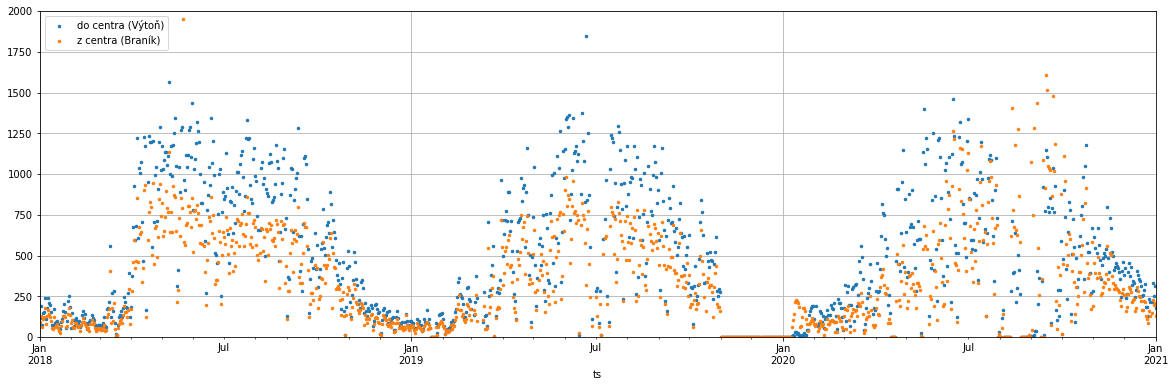

In [30]:
df = pd.DataFrame({ser.name[1]: ser for ser in [series,another]})
df.plot(**plotconfig)

In [32]:
pd.DataFrame([series,another])

Podolské nábřeží - stezka                  
                   do centra (Výtoň) z centra (Braník)
ts                                                    
2018-01-01                     115.0              92.0
2018-01-02                     190.0             128.0
2018-01-03                      72.0              62.0
2018-01-04                     149.0             112.0
2018-01-05                     155.0             125.0
...                              ...               ...
2022-03-24                     800.0             567.0
2022-03-25                     661.0             460.0
2022-03-26                     820.0             639.0
2022-03-27                     786.0             649.0
2022-03-28                     632.0             441.0

[1548 rows x 2 columns]

## DataFrame construction from raw data:

### row-wise: `list` into `pd.DataFrame`
Each member of the list is one row

* iterable with values
* `pd.Series`
* `dict`

### column-wise `dict` into `pd.DataFrame`
**key** is the column name

**value** is the content

expected key values:
* `list`
* `pd.Series`
* `1D np.array` etc.

#### Input-Output

In [157]:
?pd.read_xml

Signature:
pd.read_xml(
    path_or_buffer: 'FilePath | ReadBuffer[bytes] | ReadBuffer[str]',
    xpath: 'str' = './*',
    namespaces: 'dict[str, str] | None' = None,
    elems_only: 'bool' = False,
    attrs_only: 'bool' = False,
    names: 'Sequence[str] | None' = None,
    encoding: 'str | None' = 'utf-8',
    parser: 'XMLParsers' = 'lxml',
    stylesheet: 'FilePath | ReadBuffer[bytes] | ReadBuffer[str] | None' = None,
    compression: 'CompressionOptions' = 'infer',
    storage_options: 'StorageOptions' = None,
) -> 'DataFrame'
Docstring:
Read XML document into a ``DataFrame`` object.

.. versionadded:: 1.3.0

Parameters
----------
path_or_buffer : str, path object, or file-like object
    String, path object (implementing ``os.PathLike[str]``), or file-like
    object implementing a ``read()`` function. The string can be any valid XML
    string or a path. The string can further be a URL. Valid URL schemes
    include http, ftp, s3, and file.

xpath : str, optional, default './\*

In [160]:
?pd.read_json

Signature:
pd.read_json(
    path_or_buf=None,
    orient=None,
    typ='frame',
    dtype: 'DtypeArg | None' = None,
    convert_axes=None,
    convert_dates=True,
    keep_default_dates: 'bool' = True,
    numpy: 'bool' = False,
    precise_float: 'bool' = False,
    date_unit=None,
    encoding=None,
    encoding_errors: 'str | None' = 'strict',
    lines: 'bool' = False,
    chunksize: 'int | None' = None,
    compression: 'CompressionOptions' = 'infer',
    nrows: 'int | None' = None,
    storage_options: 'StorageOptions' = None,
)
Docstring:
Convert a JSON string to pandas object.

Parameters
----------
path_or_buf : a valid JSON str, path object or file-like object
    Any valid string path is acceptable. The string could be a URL. Valid
    URL schemes include http, ftp, s3, and file. For file URLs, a host is
    expected. A local file could be:
    ``file://localhost/path/to/table.json``.

    If you want to pass in a path object, pandas accepts any
    ``os.PathLike``.

    B

In [ ]:
?pd.read_*

In [56]:
df.tail()

,do centra (Výtoň),z centra (Braník)
ts,,
2021-03-24,668.0,444.0
2021-03-25,971.0,636.0
2021-03-26,1142.0,798.0
2021-03-27,103.0,139.0
2021-03-28,450.0,NaN


In [57]:
df.shape

(1183, 2)

In [58]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-27', '2021-03-28'],
              dtype='datetime64[ns]', name='ts', length=1183, freq='D')

In [59]:
df.columns

Index(['do centra (Výtoň)', 'z centra (Braník)'], dtype='object')

In [60]:
df.dtypes

do centra (Výtoň)    float64
z centra (Braník)    float64
dtype: object

Rows are `pd.Series`

In [61]:
df.iloc[0]

do centra (Výtoň)    115.0
z centra (Braník)     92.0
Name: 2018-01-01 00:00:00, dtype: float64

as well as columns

In [ ]:
df['do centra (Výtoň)']

## Deeper look at the index

In [62]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-27', '2021-03-28'],
              dtype='datetime64[ns]', name='ts', length=1183, freq='D')

In [63]:
df.index.values

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', ...,
       '2021-03-26T00:00:00.000000000', '2021-03-27T00:00:00.000000000',
       '2021-03-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [64]:
df.index.dtype

dtype('<M8[ns]')

## Dtypes

* Numeric - `int64` and `float64`
* Datetime - `datetime64[ns]`
    * Datetimes can be timezone-aware
    * variable precision

    * see `pd.to_datetime`
* Object - everything else
    * most often `str`
    * But also `list` or virtually anything

* Custom specialized datatypes 
    * `geometry` in `geopandas`

## Path to `MultiIndex`
https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [65]:
df

,do centra (Výtoň),z centra (Braník)
ts,,
2018-01-01,115.0,92.0
2018-01-02,190.0,128.0
2018-01-03,72.0,62.0
2018-01-04,149.0,112.0
2018-01-05,155.0,125.0
...,...,...
2021-03-24,668.0,444.0
2021-03-25,971.0,636.0
2021-03-26,1142.0,798.0


In [33]:
detections

location          direction            ts        
Anděl (Plzeňská)  Plzeňská (z centra)  2019-01-20    0.0
                                       2019-01-21    0.0
                                       2019-01-22    0.0
                                       2019-01-23    0.0
                                       2019-01-24    0.0
                                                    ... 
Šeberov           Šeberov              2022-03-24    0.0
                                       2022-03-25    0.0
                                       2022-03-26    0.0
                                       2022-03-27    0.0
                                       2022-03-28    0.0
Name: value, Length: 98593, dtype: float64

In [ ]:
detections.index

In [75]:
detections.loc[('Anděl (Plzeňská)','Plzeňská (z centra)')]

ts
2019-01-20     0.0
2019-01-21     0.0
2019-01-22     0.0
2019-01-23     0.0
2019-01-24     0.0
              ... 
2021-03-23     5.0
2021-03-24    61.0
2021-03-25    66.0
2021-03-26    62.0
2021-03-27     8.0
Name: value, Length: 732, dtype: float64

In [71]:
detections.loc[('Anděl (Plzeňská)', 'Plzeňská (z centra)', '2019-01-20')]

0.0

use `pd.IndexSlice` to slice multiindices

In [73]:
idx = pd.IndexSlice
detections.loc[idx['Anděl (Plzeňská)',:, '2020-03-01':'2020-06-01']]

location          direction              ts        
Anděl (Plzeňská)  Plzeňská (z centra)    2020-03-01    34.0
                                         2020-03-02    89.0
                                         2020-03-03    58.0
                                         2020-03-04    73.0
                                         2020-03-05    81.0
                                                       ... 
                  Štefánikova (centrum)  2020-05-28    27.0
                                         2020-05-29    36.0
                                         2020-05-30    18.0
                                         2020-05-31    10.0
                                         2020-06-01    50.0
Name: value, Length: 186, dtype: float64

## Reshaping and pivoting

https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

### Reshape `Series` into `DataFrame`: `unstack`

In [34]:
detections.head()

location          direction            ts        
Anděl (Plzeňská)  Plzeňská (z centra)  2019-01-20    0.0
                                       2019-01-21    0.0
                                       2019-01-22    0.0
                                       2019-01-23    0.0
                                       2019-01-24    0.0
Name: value, dtype: float64

In [35]:
detections.unstack(['location','direction'])

location      Anděl (Plzeňská)                       Atletická          \
direction  Plzeňská (z centra) Štefánikova (centrum)  Ladronka Strahov   
ts                                                                       
2018-01-01                 NaN                   NaN       NaN     NaN   
2018-01-02                 NaN                   NaN       NaN     NaN   
2018-01-03                 NaN                   NaN       NaN     NaN   
2018-01-04                 NaN                   NaN       NaN     NaN   
2018-01-05                 NaN                   NaN       NaN     NaN   
...                        ...                   ...       ...     ...   
2022-03-24                 0.0                 501.0     255.0   128.0   
2022-03-25                 0.0                 468.0     189.0   214.0   
2022-03-26                 0.0                 357.0     175.0   173.0   
2022-03-27                 0.0                 200.0      91.0    10.0   
2022-03-28                 0.0                 301.0      98.0   158.0   

location   Barrandovský most            Celetná                      Chodov  \
direction  Barrandovský most Zlíchov Ovocný trh Prašná brána Chodov centrum   
ts                                                                            
2018-01-01             143.0   179.0       50.0         55.0           32.0   
2018-01-02             106.0   115.0      126.0        137.0           44.0   
2018-01-03              42.0    53.0      143.0         97.0           25.0   
2018-01-04             101.0   112.0      138.0        141.0           36.0   
2018-01-05             111.0   121.0      131.0        116.0           56.0   
...                      ...     ...        ...          ...            ...   
2022-03-24             425.0   546.0        NaN          NaN          240.0   
2022-03-25             407.0   544.0        NaN          NaN          207.0   
2022-03-26             559.0   788.0        NaN          NaN          354.0   
2022-03-27             525.0   742.0        NaN          NaN          357.0   
2022-03-28             349.0   447.0        NaN          NaN          194.0   

location                ... Střešovice          U Českých loděnic             \
direction  ul. Türkova  ...  do centra z centra             Libeň Povltavská   
ts                      ...                                                    
2018-01-01        22.0  ...        3.0      6.0               NaN        NaN   
2018-01-02        18.0  ...       12.0      9.0               NaN        NaN   
2018-01-03        18.0  ...        6.0      6.0               NaN        NaN   
2018-01-04        27.0  ...        9.0     19.0               NaN        NaN   
2018-01-05        32.0  ...       10.0      8.0               NaN        NaN   
...                ...  ...        ...      ...               ...        ...   
2022-03-24       176.0  ...        0.0      0.0             588.0      655.0   
2022-03-25       165.0  ...        0.0      0.0             528.0      593.0   
2022-03-26       240.0  ...        0.0      0.0             907.0      890.0   
2022-03-27       226.0  ...        0.0      0.0             984.0     1123.0   
2022-03-28       110.0  ...        0.0      0.0             419.0      514.0   

location   V Zámcích         Vršovická             Šeberov          
direction    Bohnice Klecany     Nusle Strašnice Kunratice Šeberov  
ts                                                                  
2018-01-01       NaN     NaN      50.0      37.0      31.0    27.0  
2018-01-02       NaN     NaN      52.0      44.0      12.0    10.0  
2018-01-03       NaN     NaN      35.0      29.0       9.0     3.0  
2018-01-04       NaN     NaN      56.0      52.0       4.0     8.0  
2018-01-05       NaN     NaN      54.0      52.0      15.0    14.0  
...              ...     ...       ...       ...       ...     ...  
2022-03-24     480.0   628.0       0.0       0.0       0.0     0.0  
2022-03-25     435.0   566.0       0.0       

### `Stack` to `series`

Columns are index-like 

In [84]:
df.stack()

ts                           
2018-01-01  do centra (Výtoň)     115.0
            z centra (Braník)      92.0
2018-01-02  do centra (Výtoň)     190.0
            z centra (Braník)     128.0
2018-01-03  do centra (Výtoň)      72.0
                                  ...  
2021-03-26  do centra (Výtoň)    1142.0
            z centra (Braník)     798.0
2021-03-27  do centra (Výtoň)     103.0
            z centra (Braník)     139.0
2021-03-28  do centra (Výtoň)     450.0
Length: 2335, dtype: float64

## Apply functions on `pd.Series`

### Aggregating

* decrease dimensionality

In [43]:
series.mean()

494.71167645140247

In [46]:
series.min()

0.0

In [57]:
series.sum()

758393.0

### Transforming

* preserves shape

In [48]:
series.diff()

ts
2018-01-01      NaN
2018-01-02     75.0
2018-01-03   -118.0
2018-01-04     77.0
2018-01-05      6.0
              ...  
2022-03-24     -3.0
2022-03-25   -139.0
2022-03-26    159.0
2022-03-27    -34.0
2022-03-28   -154.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 1548, dtype: float64

In [49]:
series.pct_change()

ts
2018-01-01         NaN
2018-01-02    0.652174
2018-01-03   -0.621053
2018-01-04    1.069444
2018-01-05    0.040268
                ...   
2022-03-24   -0.003736
2022-03-25   -0.173750
2022-03-26    0.240545
2022-03-27   -0.041463
2022-03-28   -0.195929
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 1548, dtype: float64

In [58]:
series.cumsum()

ts
2018-01-01       115.0
2018-01-02       305.0
2018-01-03       377.0
2018-01-04       526.0
2018-01-05       681.0
                ...   
2022-03-24    755494.0
2022-03-25    756155.0
2022-03-26    756975.0
2022-03-27    757761.0
2022-03-28    758393.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 1548, dtype: float64

#### Custom functions

In [59]:
def custom_transforming_function(x):
    return (x ** 2) -25

series.apply(custom_transforming_function)

ts
2018-01-01     13200.0
2018-01-02     36075.0
2018-01-03      5159.0
2018-01-04     22176.0
2018-01-05     24000.0
                ...   
2022-03-24    639975.0
2022-03-25    436896.0
2022-03-26    672375.0
2022-03-27    617771.0
2022-03-28    399399.0
Name: (Podolské nábřeží - stezka, do centra (Výtoň)), Length: 1548, dtype: float64

In [ ]:
series.apply(lambda x: (x**2) -25)

* extremely useful for various string or datetime operations - cleaning, verifying etc.


### Applying functions on `pd.DataFrame`

In [71]:
df

,do centra (Výtoň),z centra (Braník)
ts,,
2018-01-01,115.0,92.0
2018-01-02,190.0,128.0
2018-01-03,72.0,62.0
2018-01-04,149.0,112.0
2018-01-05,155.0,125.0
...,...,...
2022-03-24,800.0,567.0
2022-03-25,661.0,460.0
2022-03-26,820.0,639.0


#### Aggregating

In [74]:
df.sum()

do centra (Výtoň)    758393.0
z centra (Braník)    552890.0
dtype: float64

In [73]:
df.sum(axis=1)

ts
2018-01-01     207.0
2018-01-02     318.0
2018-01-03     134.0
2018-01-04     261.0
2018-01-05     280.0
               ...  
2022-03-24    1367.0
2022-03-25    1121.0
2022-03-26    1459.0
2022-03-27    1435.0
2022-03-28    1073.0
Length: 1548, dtype: float64

#### Transforming functions

In [84]:
df.cumsum()

,do centra (Výtoň),z centra (Braník)
ts,,
2018-01-01,115.0,92.0
2018-01-02,305.0,220.0
2018-01-03,377.0,282.0
2018-01-04,526.0,394.0
2018-01-05,681.0,519.0
...,...,...
2022-03-24,755494.0,550701.0
2022-03-25,756155.0,551161.0
2022-03-26,756975.0,551800.0


In [83]:
df.cumsum(axis=1)

,do centra (Výtoň),z centra (Braník)
ts,,
2018-01-01,115.0,207.0
2018-01-02,190.0,318.0
2018-01-03,72.0,134.0
2018-01-04,149.0,261.0
2018-01-05,155.0,280.0
...,...,...
2022-03-24,800.0,1367.0
2022-03-25,661.0,1121.0
2022-03-26,820.0,1459.0


#### Custom functions `dataframe.apply`

In [106]:
def describe_day(x):
    dows = {0:'Sunday',}
    date = x.name
    first_col, second_col = x.index
    return f'On {date.day_name()} of {date.month_name()} {date.day}, {date.year}, there were {x.loc[first_col]:g} bikers in the direction {first_col} and {x.loc[second_col]:g} in the opposite'
df.apply(describe_day,axis=1)

ts
2018-01-01    On Monday of January 1, 2018, there were 115 b...
2018-01-02    On Tuesday of January 2, 2018, there were 190 ...
2018-01-03    On Wednesday of January 3, 2018, there were 72...
2018-01-04    On Thursday of January 4, 2018, there were 149...
2018-01-05    On Friday of January 5, 2018, there were 155 b...
                                    ...                        
2022-03-24    On Thursday of March 24, 2022, there were 800 ...
2022-03-25    On Friday of March 25, 2022, there were 661 bi...
2022-03-26    On Saturday of March 26, 2022, there were 820 ...
2022-03-27    On Sunday of March 27, 2022, there were 786 bi...
2022-03-28    On Monday of March 28, 2022, there were 632 bi...
Length: 1548, dtype: object

In [111]:
def describe_direction(x):
    return f'Between {x.index.min():%Y/%m/%d} and {x.index.max():%Y/%m/%d} there were on average {x.mean()} with standard deviation {x.std()}'

df.apply(describe_direction,axis=0)

do centra (Výtoň)    Between 2018/01/01 and 2022/03/28 there were o...
z centra (Braník)    Between 2018/01/01 and 2022/03/28 there were o...
dtype: object

### Unleashing apply and multi-index

In [112]:
detections

location          direction            ts        
Anděl (Plzeňská)  Plzeňská (z centra)  2019-01-20    0.0
                                       2019-01-21    0.0
                                       2019-01-22    0.0
                                       2019-01-23    0.0
                                       2019-01-24    0.0
                                                    ... 
Šeberov           Šeberov              2022-03-24    0.0
                                       2022-03-25    0.0
                                       2022-03-26    0.0
                                       2022-03-27    0.0
                                       2022-03-28    0.0
Name: value, Length: 98593, dtype: float64

In [69]:
detcols = detections.unstack(['location','direction'])
detcols

location      Anděl (Plzeňská)                       Atletická          \
direction  Plzeňská (z centra) Štefánikova (centrum)  Ladronka Strahov   
ts                                                                       
2018-01-01                 NaN                   NaN       NaN     NaN   
2018-01-02                 NaN                   NaN       NaN     NaN   
2018-01-03                 NaN                   NaN       NaN     NaN   
2018-01-04                 NaN                   NaN       NaN     NaN   
2018-01-05                 NaN                   NaN       NaN     NaN   
...                        ...                   ...       ...     ...   
2022-03-24                 0.0                 501.0     255.0   128.0   
2022-03-25                 0.0                 468.0     189.0   214.0   
2022-03-26                 0.0                 357.0     175.0   173.0   
2022-03-27                 0.0                 200.0      91.0    10.0   
2022-03-28                 0.0                 301.0      98.0   158.0   

location   Barrandovský most            Celetná                      Chodov  \
direction  Barrandovský most Zlíchov Ovocný trh Prašná brána Chodov centrum   
ts                                                                            
2018-01-01             143.0   179.0       50.0         55.0           32.0   
2018-01-02             106.0   115.0      126.0        137.0           44.0   
2018-01-03              42.0    53.0      143.0         97.0           25.0   
2018-01-04             101.0   112.0      138.0        141.0           36.0   
2018-01-05             111.0   121.0      131.0        116.0           56.0   
...                      ...     ...        ...          ...            ...   
2022-03-24             425.0   546.0        NaN          NaN          240.0   
2022-03-25             407.0   544.0        NaN          NaN          207.0   
2022-03-26             559.0   788.0        NaN          NaN          354.0   
2022-03-27             525.0   742.0        NaN          NaN          357.0   
2022-03-28             349.0   447.0        NaN          NaN          194.0   

location                ... Střešovice          U Českých loděnic             \
direction  ul. Türkova  ...  do centra z centra             Libeň Povltavská   
ts                      ...                                                    
2018-01-01        22.0  ...        3.0      6.0               NaN        NaN   
2018-01-02        18.0  ...       12.0      9.0               NaN        NaN   
2018-01-03        18.0  ...        6.0      6.0               NaN        NaN   
2018-01-04        27.0  ...        9.0     19.0               NaN        NaN   
2018-01-05        32.0  ...       10.0      8.0               NaN        NaN   
...                ...  ...        ...      ...               ...        ...   
2022-03-24       176.0  ...        0.0      0.0             588.0      655.0   
2022-03-25       165.0  ...        0.0      0.0             528.0      593.0   
2022-03-26       240.0  ...        0.0      0.0             907.0      890.0   
2022-03-27       226.0  ...        0.0      0.0             984.0     1123.0   
2022-03-28       110.0  ...        0.0      0.0             419.0      514.0   

location   V Zámcích         Vršovická             Šeberov          
direction    Bohnice Klecany     Nusle Strašnice Kunratice Šeberov  
ts                                                                  
2018-01-01       NaN     NaN      50.0      37.0      31.0    27.0  
2018-01-02       NaN     NaN      52.0      44.0      12.0    10.0  
2018-01-03       NaN     NaN      35.0      29.0       9.0     3.0  
2018-01-04       NaN     NaN      56.0      52.0       4.0     8.0  
2018-01-05       NaN     NaN      54.0      52.0      15.0    14.0  
...              ...     ...       ...       ...       ...     ...  
2022-03-24     480.0   628.0       0.0       0.0       0.0     0.0  
2022-03-25     435.0   566.0       0.0       

In [113]:
detcols.median()

location           direction            
Anděl (Plzeňská)   Plzeňská (z centra)       56.0
                   Štefánikova (centrum)     63.0
Atletická          Ladronka                  83.0
                   Strahov                  113.0
Barrandovský most  Barrandovský most        256.5
                                            ...  
V Zámcích          Klecany                  224.0
Vršovická          Nusle                    128.0
                   Strašnice                 91.0
Šeberov            Kunratice                  9.0
                   Šeberov                    8.0
Length: 71, dtype: float64

In [116]:
detcols.apply([np.mean,np.median,np.std])

location     Anděl (Plzeňská)                        Atletická              \
direction Plzeňská (z centra) Štefánikova (centrum)   Ladronka     Strahov   
mean                60.062500             97.370333  99.636878  120.759000   
median              56.000000             63.000000  83.000000  113.000000   
std                 38.094393            104.410539  93.561533  103.807548   

location  Barrandovský most                 Celetná               \
direction Barrandovský most     Zlíchov  Ovocný trh Prašná brána   
mean             318.588477  419.868313  161.786139   192.217822   
median           256.500000  336.000000  156.000000   176.000000   
std              237.081496  319.782711   85.488964   112.834055   

location          Chodov              ... Střešovice             \
direction Chodov centrum ul. Türkova  ...  do centra   z centra   
mean          106.931714  123.168857  ...  10.166339   7.932592   
median         84.000000   68.000000  ...   0.000000   0.000000   
std            92.092291  668.929612  ...  19.359193  14.750580   

location  U Českých loděnic               V Zámcích               Vršovická  \
direction             Libeň  Povltavská     Bohnice     Klecany       Nusle   
mean             394.952222  452.528481  364.440961  420.503553  194.265220   
median           278.000000  306.000000  202.000000  224.000000  128.000000   
std              345.276274  411.740243  384.636548  444.946830  258.158348   

location                 Šeberov             
direction   Strašnice  Kunratice    Šeberov  
mean       141.009148  34.848513  38.227188  
median      91.000000   9.000000   8.000000  
std        211.585941  49.898467  55.988354  

[3 rows x 71 columns]

In [93]:
def share_of_missing(col):
    return col[col.isna()].shape[0]/col.shape[0]
detcols.apply(share_of_missing)

location           direction            
Anděl (Plzeňská)   Plzeňská (z centra)      0.456853
                   Štefánikova (centrum)    0.471235
Atletická          Ladronka                 0.561760
                   Strahov                  0.463621
Barrandovský most  Barrandovský most        0.075296
                                              ...   
V Zámcích          Klecany                  0.476311
Vršovická          Nusle                    0.100677
                   Strašnice                0.107445
Šeberov            Kunratice                0.183587
                   Šeberov                  0.185279
Length: 71, dtype: float64

### Row-wise

In [117]:
def get_max_counter(row):
    recordman = row.idxmax()
    return pd.Series({'location':recordman[0],'direction':recordman[1],'value':row.max()})
detcols.apply(get_max_counter,axis=1)

,location,direction,value
ts,,,
2018-01-01,Modřany,centrum,320.0
2018-01-02,Podolské nábřeží - stezka,do centra (Výtoň),190.0
2018-01-03,Celetná,Ovocný trh,143.0
2018-01-04,Podolské nábřeží - stezka,do centra (Výtoň),149.0
2018-01-05,Podolské nábřeží - stezka,do centra (Výtoň),155.0
...,...,...,...
2022-03-24,Smetanovo nábřeží,Karlův most,1009.0
2022-03-25,Smetanovo nábřeží,Karlův most,985.0
2022-03-26,V Zámcích,Klecany,1459.0


## Group By

**Split-Apply-Combine Logic**

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


* Splitting the data into groups based on some criteria.

* Applying a function to each group independently.

* Combining the results into a data structure.



In [100]:
detections

location          direction            ts        
Anděl (Plzeňská)  Plzeňská (z centra)  2019-01-20    0.0
                                       2019-01-21    0.0
                                       2019-01-22    0.0
                                       2019-01-23    0.0
                                       2019-01-24    0.0
                                                    ... 
Šeberov           Šeberov              2021-03-23    NaN
                                       2021-03-24    NaN
                                       2021-03-25    NaN
                                       2021-03-26    NaN
                                       2021-03-27    NaN
Name: value, Length: 73339, dtype: float64

<AxesSubplot:xlabel='location,direction'>

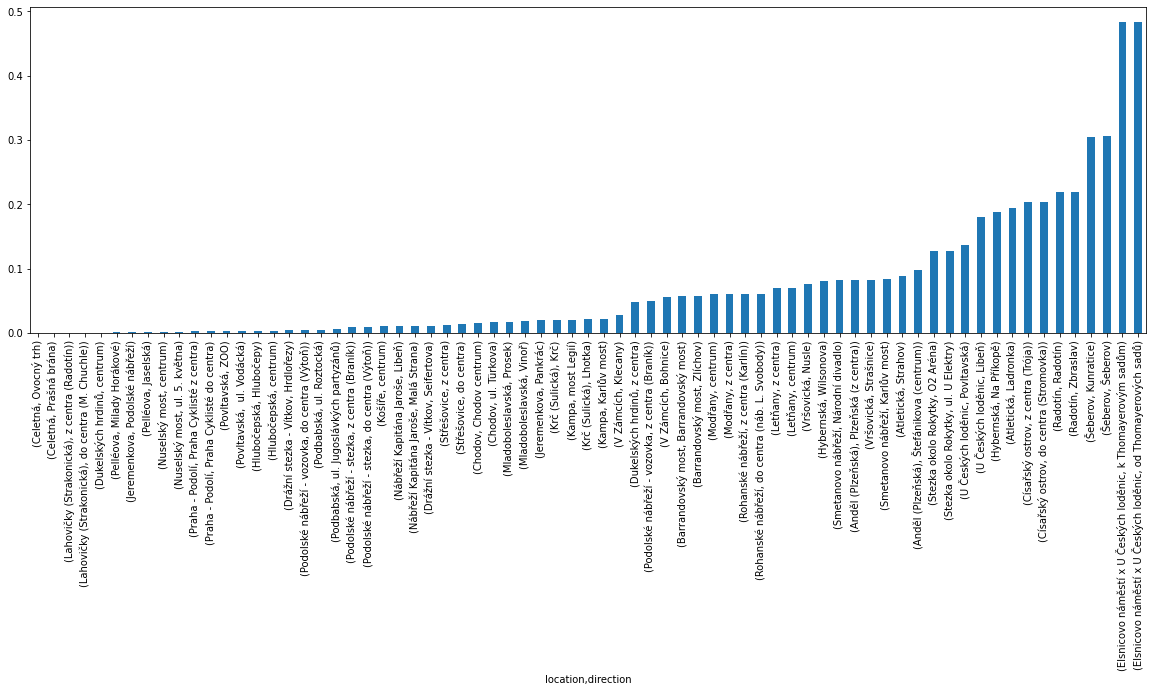

In [123]:
def share_of_missing(col):
    return col[col.isna()].shape[0]/col.shape[0]
detections.groupby(['location','direction']).apply(share_of_missing).sort_values().plot.bar(figsize=(20,6))

In [126]:
detections.groupby(['location','direction']).median()

location           direction            
Anděl (Plzeňská)   Plzeňská (z centra)       56.0
                   Štefánikova (centrum)     63.0
Atletická          Ladronka                  83.0
                   Strahov                  113.0
Barrandovský most  Barrandovský most        256.5
                                            ...  
V Zámcích          Klecany                  224.0
Vršovická          Nusle                    128.0
                   Strašnice                 91.0
Šeberov            Kunratice                  9.0
                   Šeberov                    8.0
Name: value, Length: 71, dtype: float64

### Vítek's messy analytics one-liners

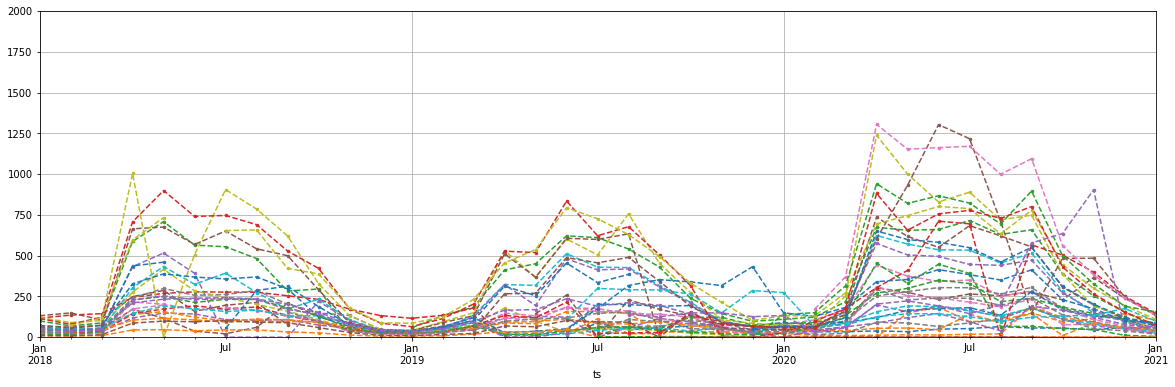

In [111]:
detections.groupby(['location',pd.Grouper(level='ts',freq='1M')]).median().unstack('location').plot(ls='--',legend=False,**plotconfig);

<AxesSubplot:xlabel='location'>

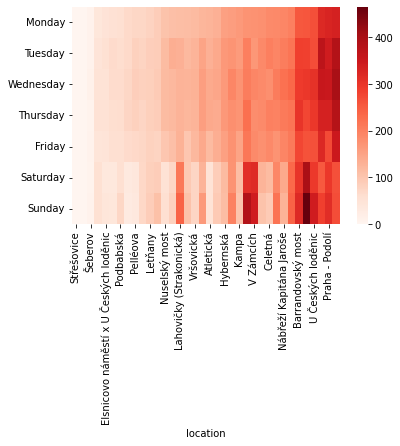

In [148]:
dows_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.heatmap(detections.groupby(['location',lambda idx: idx[2].day_name()]).median().unstack('location').loc[dows_order].sort_values(by='Monday',axis=1),cmap='Reds')

<AxesSubplot:title={'center':'Median rides across years (weekly aggregations; only March - october)'}>

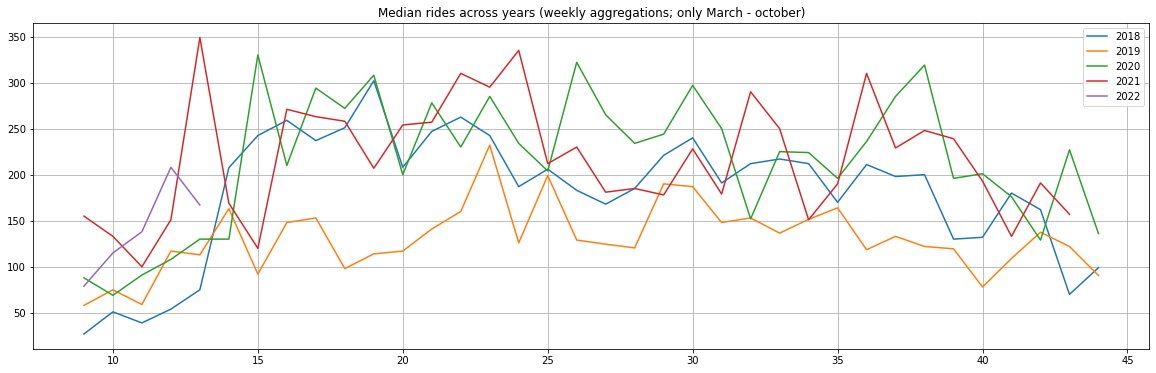

In [149]:
detections[detections.index.get_level_values('ts').month.isin([3,4,5,6,7,8,9,10])].dropna().groupby([lambda idx: idx[2].year,lambda idx: idx[2].week]).median().unstack(0).plot(title='Median rides across years (weekly aggregations; only March - october)',figsize=(20,6),grid=True)

### Group by and Apply - Number of missing values per group and per month

<AxesSubplot:xlabel='location'>

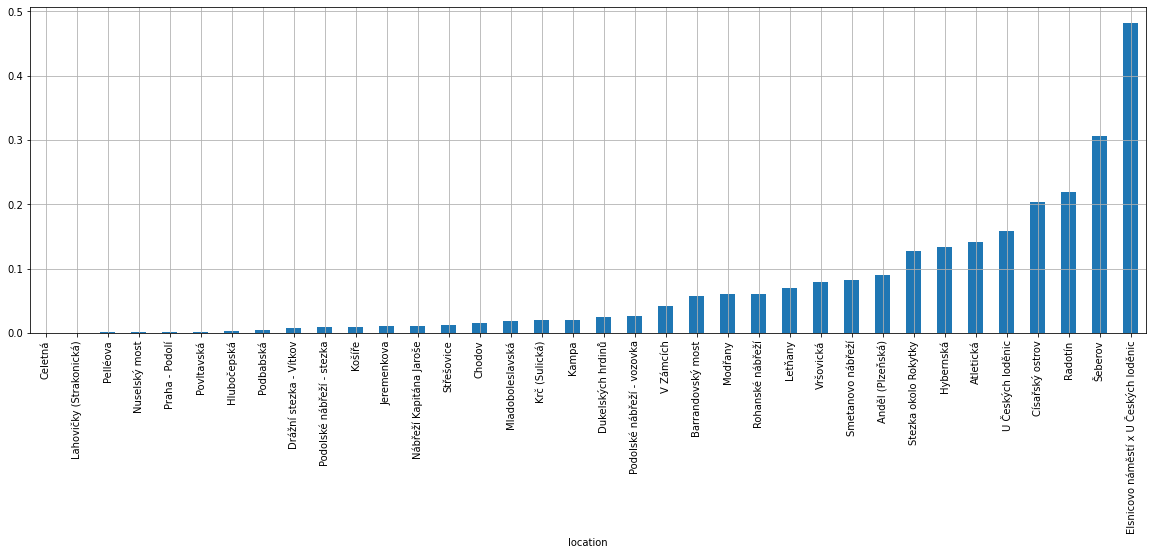

In [151]:
def share_of_missing_values(g):
    return 1-(g.dropna().shape[0]/g.shape[0])

detections.groupby(['location']).apply(share_of_missing_values).sort_values().plot.bar(figsize=(20,6),grid=True)

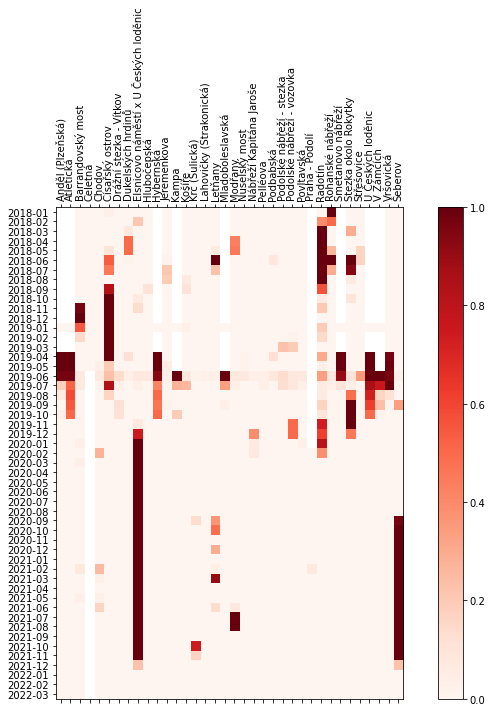

In [152]:
missing = detections.groupby(['location',pd.Grouper(level='ts',freq='1M')]).apply(share_of_missing_values).unstack('location')

fig, ax = plt.subplots(1,1,figsize=(10,10))
img = ax.matshow(missing,cmap='Reds')

ax.set_yticks(range(len(missing.index)))
ax.set_yticklabels(missing.index.strftime('%Y-%m'))

ax.set_xticks(range(len(missing.columns)))
ax.set_xticklabels(missing.columns,rotation=90)
fig.colorbar(img)
fig.tight_layout()

## Merging and joining datasets
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

* `pd.concat` - vertical alignment (along index)
* `pd.merge` - horizontal alignment (along columns, by )
    * `df.join` - merge on index


### Concatenate

![Concatenating schema](./img/concat.png)

### Merge
![Concatenating schema](./img/merge.png)

## Join

## Time-series 

In [ ]:
detections.groupby(['location','direction']).apply(lambda g:g.pct_change()).unstack(['location','direction'])

## Rolling

## Plotting with Matplotlib